In [15]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dataset = pd.read_csv(r"C:\Users\Mega Computers\Downloads\archive (1)\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


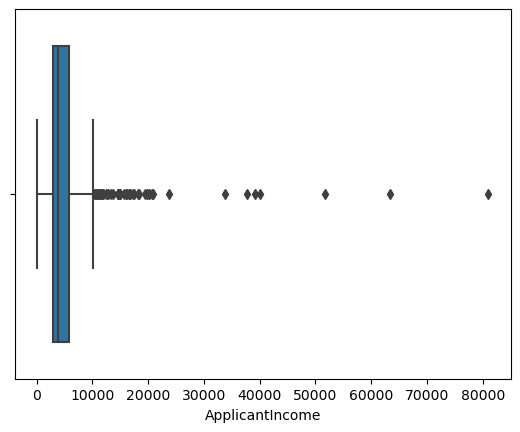

In [14]:
sns.boxplot(x = "ApplicantIncome" , data=dataset)
plt.show()

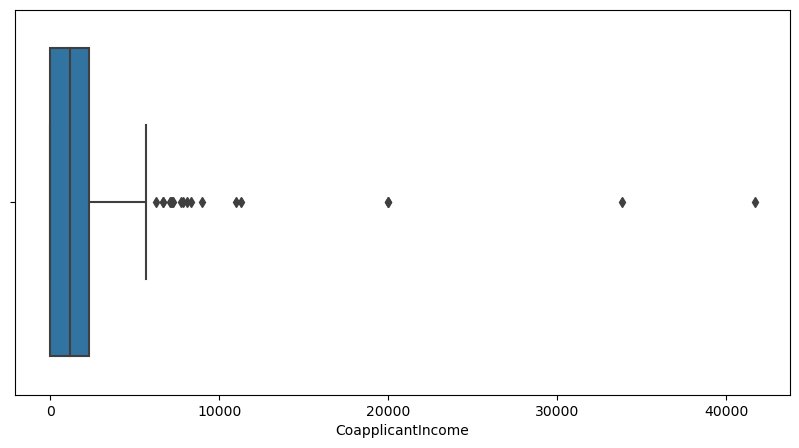

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome" , data=dataset)
plt.show()



C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_21404\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


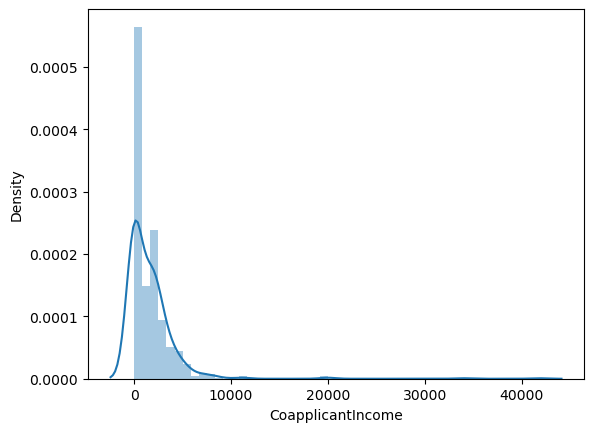

In [12]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

# understand outlier

In [16]:
l = [5,6,7,7,5,6,5,4]
np.mean(l)

5.625

In [20]:
l = [5,6,7,7,5,6,5,4 ,100]
sum(l)/len(l)

16.11111111111111

# how to Remove outlier with IQR or inter quintial range
IQR = q3-q1

min = q1 -(1.5*IQR )
max = Q3+(1.5*IQR)


deccision tree algorithm  is not effect on outlier

In [22]:
dataset.shape

(614, 13)

In [25]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [27]:
IQR = q3-q1
IQR

2297.25

In [35]:
min_range = q1 -(1.5*IQR)
max_range = q3 + (1.5*IQR)
max_range ,min_range  

(5743.125, -3445.875)

In [36]:
new_dataset =dataset[dataset["CoapplicantIncome"]<= max_range]

In [38]:
new_dataset.shape

(596, 13)

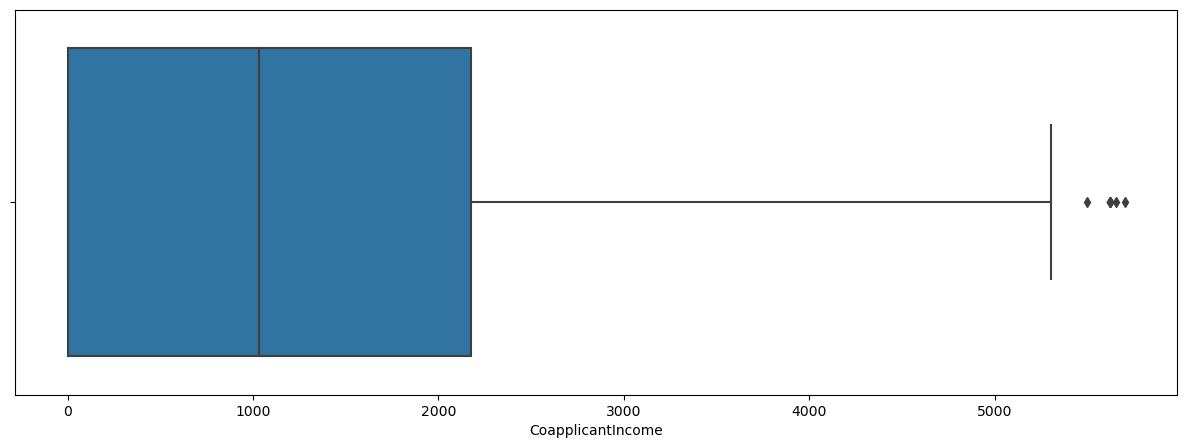

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome" , data=new_dataset)
plt.show()

# with the help of Z-Score detect outlier

In [40]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

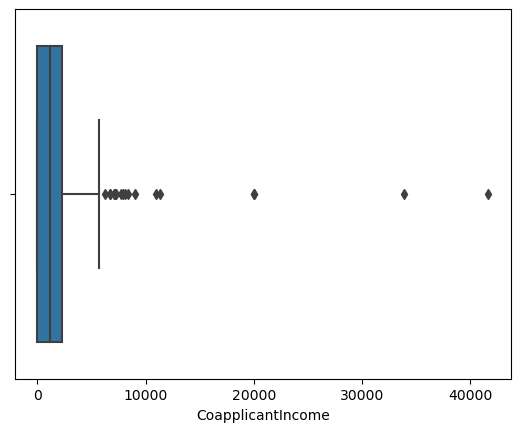

In [55]:
sns.boxplot(x = "CoapplicantIncome", data=dataset)

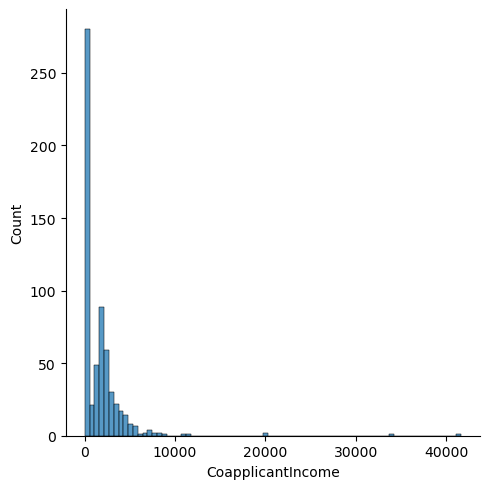

In [56]:
sns.distplot(dataset["CoapplicantIncome"])

In [57]:
min_range = dataset["CoapplicantIncome"].mean() - (3*dataset["CoapplicantIncome"].std())
max_range = dataset["CoapplicantIncome"].mean() + (3*dataset["CoapplicantIncome"].std())


In [58]:
min_range ,max_range 

(-7157.499309645475, 10399.990905699677)

In [60]:
ndataset = dataset[dataset["CoapplicantIncome"]<max_range]

In [69]:
ndataset.shape

(608, 13)

<Axes: xlabel='CoapplicantIncome'>

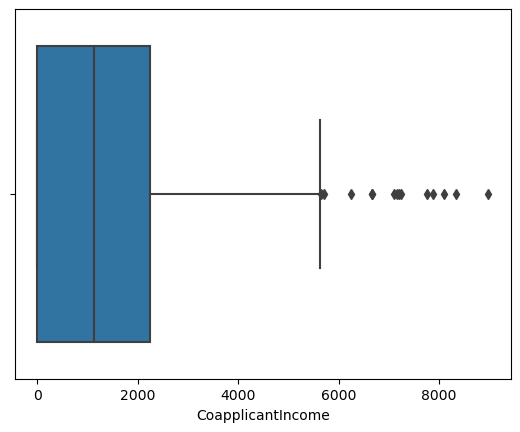

In [61]:
sns.boxplot(x = "CoapplicantIncome", data=ndataset)

# with the help of Z-Score detect outlier

In [63]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/(dataset["CoapplicantIncome"].std())

In [66]:
dataset["z_score"] = z_score

In [68]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [ ]:
import numpy as np 